# Ejercicios dataset 'Salarios' resueltos

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data\ds_salaries.csv')
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace =True)
df = df.reset_index(drop=True)

### EDA (Análisis exploratorio de datos)

- ¿Cuál es el empleo que gana más dinero?

Nos piden averiguar cual es, de los empleos que hay en el dataset, aquel que tiene un promedio de salario mayor.

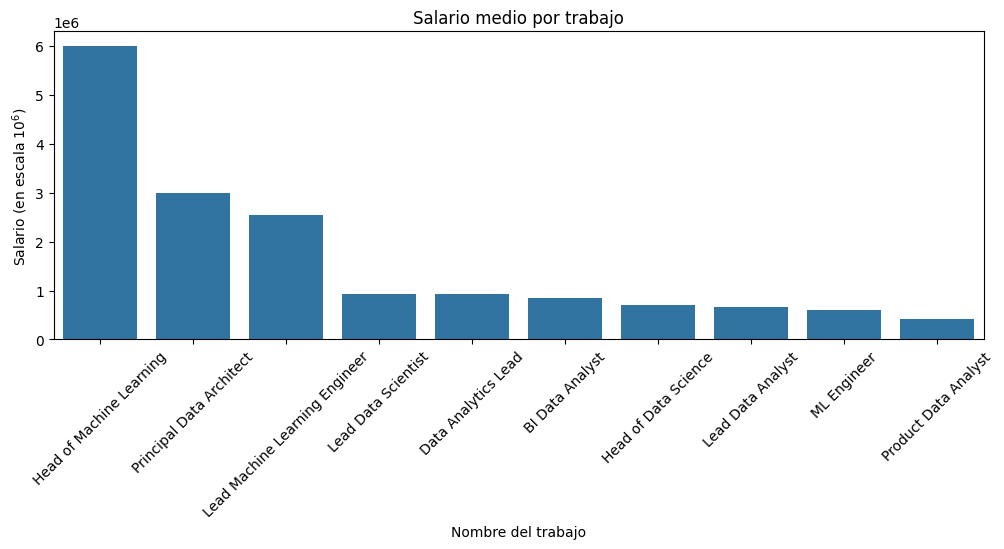

In [3]:
top_10=df.groupby('job_title')['salary'].mean().sort_values(ascending = False).round(2).head(10).reset_index()
plt.figure(figsize=(12,4))
ura=sns.barplot(x='job_title',y='salary',data=top_10)
plt.xticks(rotation =45)
plt.xlabel('Nombre del trabajo')
plt.ylabel('Salario (en escala $10^6$)')
plt.title('Salario medio por trabajo')
plt.show()

Como vemos, empleo con nombre "Head of Machine Learning" es, por mucho, el que tiene un promedio mayor, con unos 600 000 dólares anuales.

- Donde están localizadas las companias que mas pagan?

Nos piden ahora averiguar cuáles son los países donde están localizadas las compañías que mejor pagan.

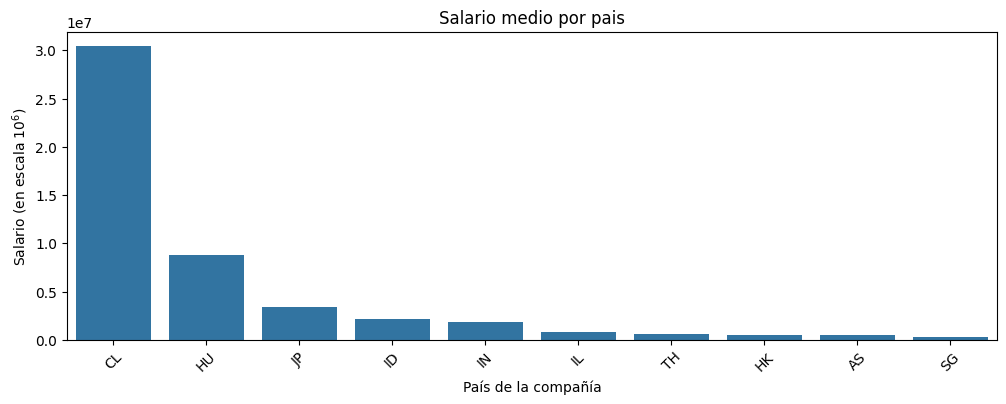

In [4]:
top_10=df.groupby('company_location')['salary'].mean().sort_values(ascending = False).round(2).head(10).reset_index()
plt.figure(figsize=(12,4))
ura=sns.barplot(x='company_location',y='salary',data=top_10)
plt.xticks(rotation =45)
plt.xlabel('País de la compañía')
plt.ylabel('Salario (en escala $10^6$)')
plt.title('Salario medio por pais')
plt.show()

Los tres países cuyas compañías mejor pagan son Chile, Hungría y Japón.

- Cual es el tipo de empleo que permite mas trabajo remoto?

Queremos averiguar qué puesto de trabajo permite un mayor trabajo en remoto. Para ello, filtramos nuestro dataset sólo para aquellas filas que tengan un ratio del 100% de trabajo en remoto para luego agrupar este nuevo dataset por tipo de trabajo, utilizando un count como función de agregación.

En este caso cambiaremos el formato de gráfica; crearemos una gráfica tipo pie en la que integraremos a los seis empleos con más personas teletrabajando al 100%.

In [5]:
top_6=df[df['remote_ratio']== 100]['job_title'].value_counts().head(6).reset_index()
import plotly.express as px
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3']
fig = px.pie(top_6, names = 'job_title', values='count', title = 'Los 6 empleos con más personas trabajando en remoto al 100 %', template = 'plotly_dark', color_discrete_sequence=colors)
fig.update_traces(textinfo='percent+label',  # Mostrar porcentaje y etiquetas
                  marker=dict(line=dict(color='#000000', width=2)))

De este modo podemos observar claramente que los "Data engineer" son los que más teletrabaja, seguidos de los "Data Scientists" y los "Data Analyst".

- ¿Cual es el salario promedio de los empleados de Data Scientist?

Para este ejercicio utilizaremos una boxplot o gráfica de bigotes, ya que lo que queremos analizar es una única variable (su )

In [6]:
data = df[df['job_title'] == 'Data Scientist']['salary'].to_frame()
fig = px.box(data)
fig.update_layout(
    title="Boxplot con outliers")
fig.show()

Aquí tenemos un problema con los outliers. Al haber valores tan elevados no nos permiten visualizar bien el gráfico de caja. Para ello, creamos una función que los elimine y hacemos la misma gráfica para poder verla bien, sin esos outliers.

In [7]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return data[(data[column] > lower_bound) & (data[column] < upper_bound)]

data = remove_outliers(data,'salary')
media = int(data.mean())
fig = px.box(data, template="plotly_white")
fig.add_shape(
    type="line",
    x0=0, x1=1, y0=media, y1=media,
    line=dict(color="red", width=2, dash="dash"),
    xref="paper", yref="y"
)

fig.update_layout(
    title="Boxplot del salario para los Data Scientist",
    title_font_size=24,  # Tamaño del título
    xaxis_title="Data Scientist",  # Ajusta según tus datos
    yaxis_title="Salario",  # Ajusta según tus datos
    font=dict(size=14),  # Tamaño general de la fuente
    plot_bgcolor="rgba(0,0,0,0)",  # Fondo transparente
    showlegend=False
)

fig.update_traces(boxpoints='all',
    marker_color='blue',  # Color del boxplot
    boxmean=True,  # Desactiva la línea de la media del boxplot
    jitter=0.3,  # Aleatoriedad de los puntos (si hay muchos valores)
    pointpos=-1.5,  # Posición de los puntos en relación a la caja
    line=dict(color="black")  # Color de la línea de la caja
)
fig.show()

Como vemos, ahora no tenemos ningún outlier y la media está en torno a los 136 000 dólares para las personas 

- ¿cuantas personas ganan por encima de los 200ks?

Creamos un par de gráficos para comparar el grupo de personas que gana menos de 200000 dólares anuales con los que ganan más. En el gráfico de barras podremos ver las cantidades absolutas, mientras que en el gráfico de tarta podremos ver los porcentajes.

<Figure size 600x400 with 0 Axes>

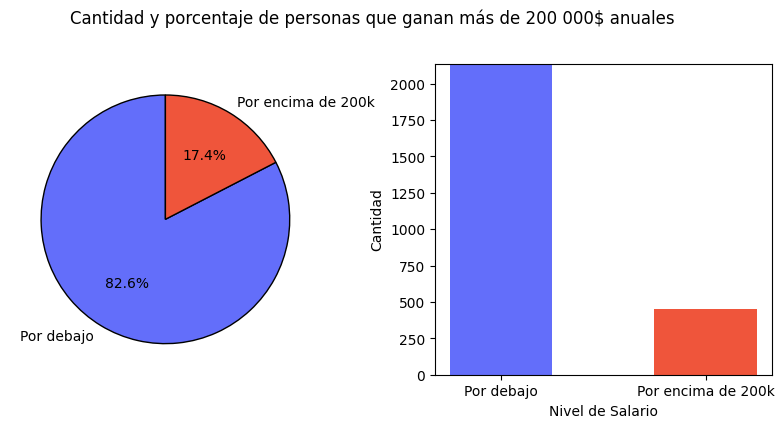

In [8]:
data = df
data['nivel_salario'] = np.where(data['salary'] > 200000, 'Por encima de 200k', 'Por debajo')


conteo_nivel_salario = df['nivel_salario'].value_counts()
plt.figure(figsize=(6,4))
fig, axs = plt.subplots(1, 2, figsize=(10, 4.2))

fig.suptitle('Cantidad y porcentaje de personas que ganan más de 200 000$ anuales')

# Gráfico de tarta
axs[0].pie(conteo_nivel_salario, labels=conteo_nivel_salario.index, colors=colors, 
           autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Gráfico de barras
axs[1].bar(conteo_nivel_salario.index, conteo_nivel_salario.values, color=colors, width = 0.5)
axs[1].set_xlabel('Nivel de Salario')
axs[1].set_ylabel('Cantidad')
axs[1].set_ylim(0, conteo_nivel_salario.max() + 1)  # Ajustar el límite del eje y

plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.85)
# Mostrar la gráfica
plt.show()

Se observa que unos 500 trabajadores, que representan aproximadamene el 17.4 % de los totales, gana más de 200000 dólares al año.

- cual es el salario promedio de los empleados Data Modeler en SE

En este caso ocurre un hecho curioso, que es el de tener únicamente dos empleados de esa compañía. Crearemos un gráfico de barras en el que enfrentamos a los dos empleados y trazamos una línea horizontal discontínua que represente el promedio.

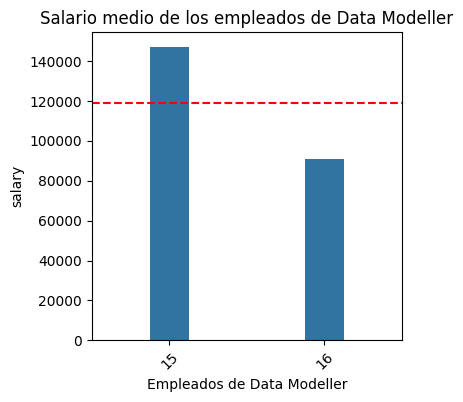

In [9]:
df2 = df[df['job_title']=='Data Modeler']
df2[df2['experience_level']=='SE']['salary'].mean().round(2)
data = df[df['job_title']=='Data Modeler'].reset_index()
media = data['salary'].mean()


plt.figure(figsize=(4,4))
ura=sns.barplot(x='index',y='salary',data=data, width= 0.25)
plt.xticks(rotation =45)
plt.xlabel('Empleados de Data Modeller')
plt.title('Salario medio de los empleados de Data Modeller')
plt.axhline(int(media), linestyle='--', color = "red",label='Media')

El primer empleado, de índice 15, percibe algo más de 140000 dólares, mientras que el segundo (índice 16), apenas supera los 90000. El promedio es de algo menos de 120000, como se puede observar.

- Para los ML Engineer, que diferencia de salario hay entre full time y part time?

Creamos dos gráficas, una de dispersión con puntos para las diferentes modalidades de empleo. Podemos observar que la gran mayoría de puntos son de tipo Full Time, y que hay mucha diversidad dentro de este grupo. Apenas tenemos un valor de Part Time.

En la segunda gráfica, mostramos el promedio de cada grupo e indicamos la diferencia en salario promedio entre los que trabajan Full Time y los que trabajan Part Time, en este caso, de 152177 dólares.

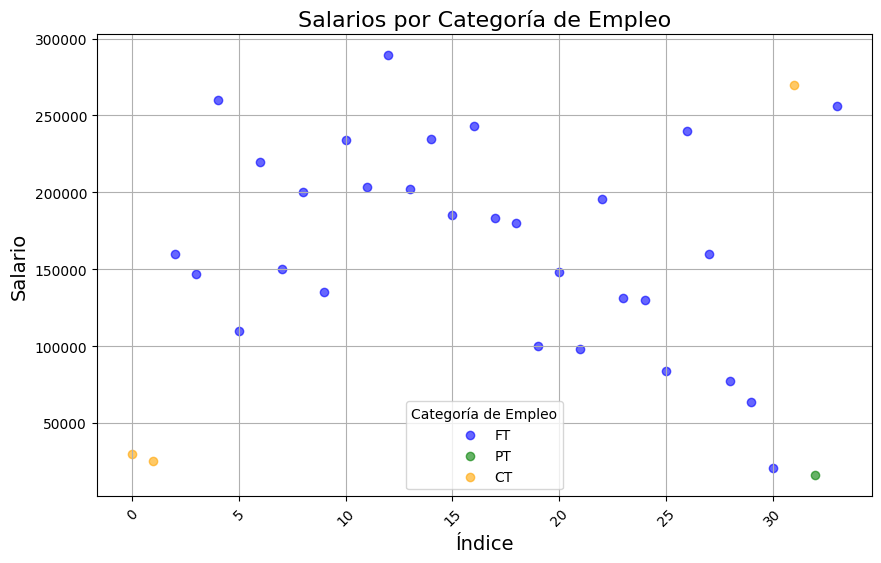

In [10]:
data = df[['employment_type','salary_in_usd']][df['job_title']=='ML Engineer']

data = data.reset_index(drop=True)
colores = {
    'FT': 'blue',
    'PT': 'green',
    'CT': 'orange'
}


# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Usar un bucle para dibujar los puntos de cada categoría
for categoria, color in colores.items():
    subset = data[data['employment_type'] == categoria]
    plt.scatter(subset.index, subset['salary_in_usd'], label=categoria, color=color, alpha=0.6)

plt.title('Salarios por Categoría de Empleo', fontsize=16)
plt.xlabel('Índice', fontsize=14)
plt.ylabel('Salario', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Categoría de Empleo')
plt.grid(True)

# Mostrar el gráfico
plt.show()

Text(1.1, 152117.9, 'Diferencia FT y PT: 152117.90 $')

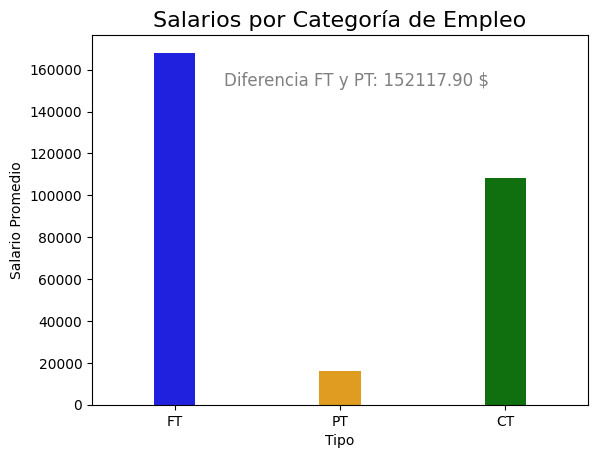

In [11]:
SFT = df[df['job_title']=='ML Engineer'][df['employment_type']=='FT']['salary_in_usd'].mean()
SPT = df[df['job_title']=='ML Engineer'][df['employment_type']=='PT']['salary_in_usd'].mean()
SCT = df[df['job_title']=='ML Engineer'][df['employment_type']=='CT']['salary_in_usd'].mean()

promedios_predefinidos = {
    'FT': SFT,  # Ejemplo de salario promedio
    'PT': SPT,
    'CT': SCT
}
diferencia = SFT - SPT
df_promedios = pd.DataFrame(list(promedios_predefinidos.items()), columns=['Tipo', 'Salario Promedio'])
sns.barplot(x='Tipo',y='Salario Promedio',data=df_promedios, width= 0.25, palette=['blue', 'orange', 'green'])
plt.title('Salarios por Categoría de Empleo', fontsize=16)
plt.text(1.1, diferencia, f'Diferencia FT y PT: {diferencia:.2f} $', color='grey', fontsize=12, ha='center')


- Cual es el employment type mas frecuente entre los Business Data Analyst?

Creamos un conjunto de gráficas que compare la modalidad de trabajo en seis empleos diferentes. De este modo, además de saber qué tipo de trabajo es más frecuente entre los 'Business Data Analyst', podemos ver si en otros empleos suceden hechos parecidos o si por el contrario trabajar de 'Business Data Analyst' supone una gran diferencia al resto respecto a la modalidad de trabajo.

In [12]:
data = df[['employment_type','job_title']].groupby(['job_title']).value_counts().to_frame().reset_index()
d1 = data[data['job_title'] == 'Business Data Analyst']
d2 = data[data['job_title'] == 'AI Developer']
d3 = data[data['job_title'] == 'AI Scientist']
d4 = data[data['job_title'] == 'Research Scientist']
d5 = data[data['job_title'] == 'AI Programmer']
d6 = data[data['job_title'] == 'Software Data Engineer']


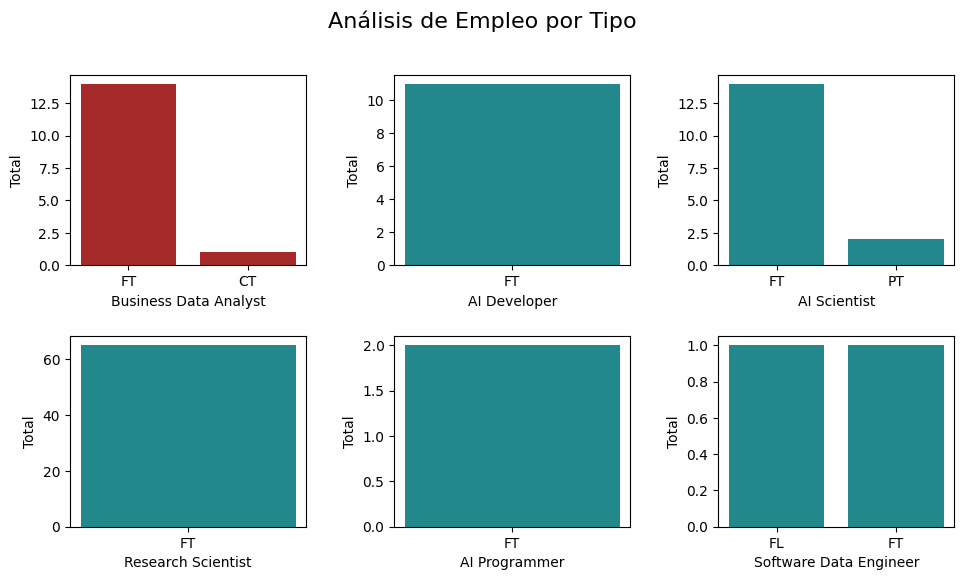

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes[0, 0].bar(d1['employment_type'], d1['count'], label='Full-Time', color='brown')
axes[0, 1].bar(d2['employment_type'], d2['count'], label='Full-Time', color="#22888B")
axes[0, 2].bar(d3['employment_type'], d3['count'], label='Full-Time', color='#22888B')
axes[1, 0].bar(d4['employment_type'], d4['count'], label='Full-Time', color='#22888B')
axes[1, 1].bar(d5['employment_type'], d5['count'], label='Full-Time', color='#22888B')
axes[1, 2].bar(d6['employment_type'], d6['count'], label='Full-Time', color='#22888B')


plt.suptitle('Análisis de Empleo por Tipo', fontsize=16)

axes[0, 0].set_xlabel('Business Data Analyst')
axes[0, 1].set_xlabel('AI Developer')
axes[0, 2].set_xlabel('AI Scientist')
axes[1, 0].set_xlabel('Research Scientist')
axes[1,1].set_xlabel('AI Programmer')
axes[1, 2].set_xlabel('Software Data Engineer')

axes[0, 0].set_ylabel('Total')
axes[0, 1].set_ylabel('Total')
axes[0, 2].set_ylabel('Total')
axes[1,0].set_ylabel('Total')
axes[1,1].set_ylabel('Total')
axes[1,2].set_ylabel('Total')

plt.tight_layout(pad=2.0)

Como vemos, no hay una grandiferencia entre los Business Data Analyst y el resto: prácticamente en todos los trabajos, salvo en el de 'Software Data Engineer', hay un dominio de la modelidad Full Time.

- En qué país, en cuanto a localización de la compañía, hay mayor ratio de teletrabajo?

En la siguiente gráfica de barras mostramos el top 10 de los países con mayor ratio de teletrabajo. Como podemos ver, en los diez países el ratio es del 100 %.

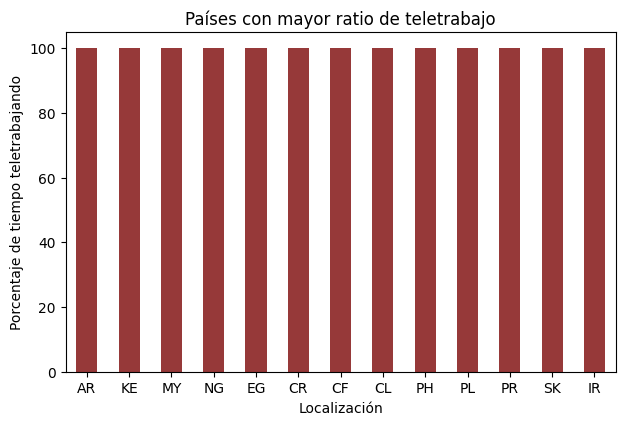

In [14]:
teletrabajo_por_pais = df.groupby(['company_location'])['remote_ratio'].mean().sort_values(ascending=False)
teletrabajo_por_pais = teletrabajo_por_pais[teletrabajo_por_pais == 100]
teletrabajo_por_pais = teletrabajo_por_pais.to_frame()
data = teletrabajo_por_pais.reset_index()
data = data.rename(columns={'company_location':'Localización'})


plt.figure(figsize=(8, 6))
sns.barplot(x="Localización",y='remote_ratio', data=data, color='brown', width= 0.5)
plt.title('Países con mayor ratio de teletrabajo')
plt.ylabel('Porcentaje de tiempo teletrabajando')
plt.tight_layout(pad=7, h_pad=0.4, w_pad=0.6)
plt.show()

Sin embargo, esta gráfica no arroja gran cantidad de información sobre el teletrabajo porque hay países con muy pocos valores que son sólo del 100 %, así que, si queremos obtener información que nos dé información sobre en qué país se teletrabaja más, tendremos que descartar a los países que tengan pocos datos. En este caso, seleccionaremos a todos los países con más de 5 datos. 

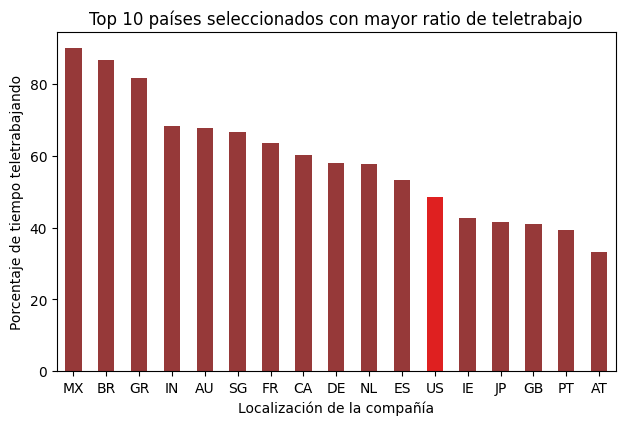

In [15]:
data1 = df.groupby(['company_location'])['remote_ratio'].mean().to_frame().reset_index()
lista = (df.groupby(['company_location'])['remote_ratio'].count().to_frame().reset_index()['remote_ratio']>5)
data2 = data1[lista]
data2 = data2.sort_values(by='remote_ratio', ascending = False)

colors = ['brown'] * len(data2)  # Inicializa todas las barras con color marrón
colors[11] = 'red'

plt.figure(figsize=(8, 6))
sns.barplot(x="company_location",y='remote_ratio', data=data2, palette=colors, width= 0.5)
plt.title('Top 10 países seleccionados con mayor ratio de teletrabajo')
plt.ylabel('Porcentaje de tiempo teletrabajando')
plt.xlabel('Localización de la compañía')
plt.tight_layout(pad=7, h_pad=0.4, w_pad=0.6)
plt.show()

Como podemos ver, México es el país de los seleccionados con mayor ratio de teletrabajo según la localización de la compañía, seguido de brasil y Gran Bretaña. 